In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# my favorite module to wrangle files; creates a path that is Unix or Windows readable
print(Path.cwd()) 

#loads data in that is stored locally
file1 = Path(r'C:\Users\Will Tirone\Desktop\Stats_Projects\random_data.csv')

C:\Users\Will Tirone\Desktop\Stats_Projects


Pretty basic equation, but just to help visualize how natural logs work; x is 0 to 100 and y is:  
$y = \log(x)$

In [3]:
# create dataframe
df = pd.read_csv(file1)
df.head()

,x,y
0,1,0.000000
1,2,0.693147
2,3,1.098612
3,4,1.386294
4,5,1.609438


Obviously, this is a perfect relationship. Interestingly, there are tons of natural phenonema that exhibit this behavior. 

Text(0.5, 0, 'Marketing Spend (thousands)')

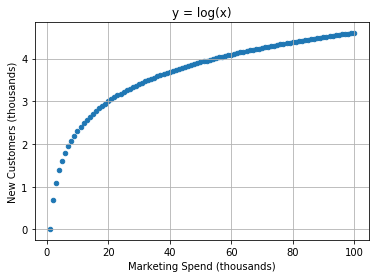

In [4]:
ax = df.plot.scatter(x='x', y='y', grid=True)
plt.title('y = log(x)')

ax.set_ylabel('New Customers (thousands)')
ax.set_xlabel('Marketing Spend (thousands)')

What if we were forecasting and wanted to know what y might be at x = 200? These are made up numbers, but if you were in a marketing department, with x = dollars spent and y = new customers generated, you would definitely want to know "how long" your advertising spend was beneficial. 

Simple enough:

In [5]:
import math as m

# formula: y = ln(x); evaluating y at x = 200
a = m.log(200)
print("At x = 200;",round(a,2))

# if a is the final value in our existing set... 
b = df['y'].iloc[99]
print("At x = 99;",round(b,2))

# then we can find the marginal increase (benefit) from 100 to 200 by doing...
# multiplied to show actual number of customers added 
c = round((a-b)*1000)
print("How many customers do we have now?", c)

At x = 200; 5.3
At x = 99; 4.61
How many customers do we have now? 693.0


How much did we spend to attract a single new customer?

In [6]:
d = ((200 - 99)*1000)/c
print('We spent: ','${:,.2f}'.format(d))

We spent:  $145.74


That's not bad! Though it's important to remember that it would become increasingly more costly (because the function is logarithmic) to attract even more customers in the future. Think about tracing it out on the curve graphed above. 

So your boss says "This is great, let's spend another $1MM on advertising!". Should you tell him that's a good idea? Let's find out.

In [7]:
# If x = 1000: 
e = m.log(1000)

print('Keep in mind, x values are in thousands')
print('At x = 1000;', round(e,2))
print('Previously, we spent $200,000')

# e and a are y-values 
f = round((e - a)*1000,2)

# e = new value, a = previous value
print('This is', f, 'new customers')
print('Per customer, on average, we spent', round(1000000/((e - a)*1000),2)) 

Keep in mind, x values are in thousands
At x = 1000; 6.91
Previously, we spent $200,000
This is 1609.44 new customers
Per customer, on average, we spent 621.33


We added 1,609 customers but they each cost almost 4.3x as much, on average, as the first 200 customers.

So that was a fun made up example, but what about some other real data that might have this phenomena? There's a pretty popular example in Psychology and Economics to answer the question "How much does money really buy happiness?".

As it turns out, according to Kahneman and Deaton (2010, https://www.princeton.edu/~deaton/downloads/deaton_kahneman_high_income_improves_evaluation_August2010.pdf) about 75,000 a year. This is logarithmic because it increases really quickly at first; if you had no money, 10,000 would make you very happy, but then individuals experience marginally lower benefit with each dollar with 75,000 being the "optimal" point. Although they don't believe that more money actually causes less happiness at any point.

So if we're looking at the whole planet, and we plotted GDP per capita vs. their happiness index, would that also be logarithmic? Let's see. I can't find a data set with both of these columns, so we'll just have to make our own. 

In [8]:
file2 = Path(r'C:\Users\Will Tirone\Desktop\Stats_Projects\GDP_PCAP.csv')
file3 = Path(r'C:\Users\Will Tirone\Desktop\Stats_Projects\national_happiness.csv')
GDP = pd.read_csv(file2)
Happiness = pd.read_csv(file3)

In [9]:
GDP.head() 

,rank,country,GDP PCAP (2017),GDP PCAP (2018)
0,1,Luxembourg,"113,954.40","105,863.20"
1,2,Switzerland,"83,583.00","80,637.40"
2,3,Norway,"82,372.40","75,389.50"
3,4,Macao SAR,"81,585.40","77,111.00"
4,5,Iceland,"75,699.60","70,248.30"


In [10]:
Happiness.head() 

,rank,COUNTRY,SCORE
0,1,Finland,7.769
1,2,Denmark,7.600
2,3,Norway,7.554
3,4,Iceland,7.494
4,5,Netherlands,7.488


In [11]:
# cleaning the data 
GDP.drop(['GDP PCAP (2017)', 'rank'], axis=1, inplace=True)
Happiness.drop(['rank'],  axis=1, inplace=True)

Happiness.rename(columns={"SCORE" : 'Happiness_Score', 'COUNTRY' : 
                         'country'}, inplace=True)
GDP.rename(columns={'COUNTRY' : 'country'}, inplace=True)

In [12]:
Joined_Set = Happiness.set_index('country').join(GDP.set_index('country'))

I joined the tables on the "country" column by changing that to the index rather than the default behavior of the number of the row as the index. We can still use df.iloc[number] to query based on position. 

In [13]:
Joined_Set.head() 

,Happiness_Score,GDP PCAP (2018)
country,,
Finland,7.769,"45,927.50"
Denmark,7.600,"56,630.60"
Norway,7.554,"75,389.50"
Iceland,7.494,"70,248.30"
Netherlands,7.488,"48,555.40"


In [14]:
# to choose a country by position 
Joined_Set.iloc[5]

Happiness_Score         7.48
GDP PCAP (2018)    80,637.40
Name: Switzerland, dtype: object

In [15]:
# or, to choose a country by name
Joined_Set.loc['Zambia']

Happiness_Score       4.107
GDP PCAP (2018)    1,491.20
Name: Zambia, dtype: object

In [16]:
# had several issues with the original data; I couldn't plot it because there were commas in the numbers, 
# so those had to be removed as well as some dashes that I replaced with zeros. 

Joined_Set['GDP PCAP (2018)'] = Joined_Set['GDP PCAP (2018)'].str.replace(',','')
Joined_Set['GDP PCAP (2018)'] = Joined_Set['GDP PCAP (2018)'].str.replace('-','0')

Joined_Set['GDP PCAP (2018)'] = Joined_Set['GDP PCAP (2018)'].astype(float)

### Results: 

The below graph is a (surprisingly) good example of a log relationship! A line of best fit would pretty clearly go up dramatically but marginal benefit would start to even out as GDP PCAP increased. 

Happiness is fairly difficult to measure (if not impossible?) so the Y axis may be a bit subjective, but generally the relationship seems to make sense. People become significantly happier when they don't have access to healthcare and then receive access, whereas someone in a developing country may only become a little bit happier when they're able to shop at Whole Foods vs. a local grocery store. 

Text(0.5, 0, 'GDP Per Capita (USD)')

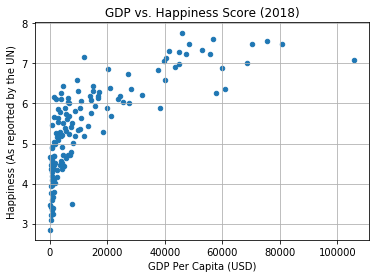

In [20]:
ax2 = Joined_Set.plot.scatter(x='GDP PCAP (2018)', y='Happiness_Score', grid=True)
plt.title('GDP vs. Happiness Score (2018)')

ax2.set_ylabel('Happiness (As reported by the UN)')
ax2.set_xlabel('GDP Per Capita (USD)')